In [1]:
# ✅ 1. 필수 라이브러리 설치
!pip install konlpy wordcloud matplotlib pandas scikit-learn tqdm --quiet

# ✅ 2. 기본 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from konlpy.tag import Okt
from tqdm import tqdm
import os

# ✅ 3. 한글 폰트 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
print("✅ 나눔고딕 폰트 적용 완료")

# ✅ 4. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 5. CSV 불러오기
file_path = "/content/drive/My Drive/시설/리텐션/관리고객해지사유분석_0509.csv"
df = pd.read_csv(file_path)
print("✅ CSV 파일 로드 완료")

# ✅ 6. 컬럼 구조 확인
print("컬럼 목록:")
print(df.columns)

# ✅ 7. 해지일자 월 단위로 변환
df['해지월'] = pd.to_datetime(df['dc'], errors='coerce').dt.to_period('M')
print("\n✅ 해지월 컬럼 생성 완료")

# ✅ 8. 텍스트 병합 및 전처리
df['사유통합'] = df[['dh', 'di']].fillna('').agg(' '.join, axis=1)

# ✅ 9. 형태소 분석기 정의
okt = Okt()
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# ✅ 10. 형태소 분석 적용
tqdm.pandas()
df['형태소'] = df['사유통합'].progress_apply(extract_nouns)

# ✅ 11. TF-IDF 기반 LDA 토픽 모델링
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# ✅ 12. 토픽 시각화
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"토픽 {topic_idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 10.1 MB/s eta 0:00:00
✅ 나눔고딕 폰트 적용 완료
Mounted at /content/drive


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 0: invalid start byte

In [3]:
# ✅ 1. 필수 라이브러리 설치
!pip install konlpy wordcloud matplotlib pandas scikit-learn tqdm --quiet

# ✅ 2. 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from konlpy.tag import Okt
from tqdm import tqdm
import os

# ✅ 3. 한글 폰트 설정 (NanumGothic)
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
print("✅ 나눔고딕 폰트 적용 완료")

# ✅ 4. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 5. CSV 파일 불러오기 (cp949 인코딩 적용)
file_path = "/content/drive/My Drive/시설/리텐션/관리고객해지사유분석_0509.csv"
df = pd.read_csv(file_path, encoding='cp949')
print("✅ CSV 파일 로드 완료")

# ✅ 6. 컬럼 목록 확인
print("컬럼 목록:")
print(df.columns)

# ✅ 7. 해지일자 월단위 변환 (dc열 → 해지월)
# ✅ 7. 해지일자 월단위 변환 (해지일자 → 해지월)
df['해지월'] = pd.to_datetime(df['해지일자'], errors='coerce').dt.to_period('M')
print("✅ 해지월 컬럼 생성 완료")

# ✅ 8. 해지사유 병합 (dh, di 열)
df['사유통합'] = df[['dh', 'di']].fillna('').agg(' '.join, axis=1)

# ✅ 9. 형태소 분석기 정의 (명사만 추출)
okt = Okt()
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# ✅ 10. 형태소 분석 적용
tqdm.pandas()
df['형태소'] = df['사유통합'].progress_apply(extract_nouns)

# ✅ 11. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

# ✅ 12. LDA 토픽 모델링
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# ✅ 13. 토픽 결과 출력
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n[토픽 {topic_idx + 1}]")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

✅ 나눔고딕 폰트 적용 완료
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSV 파일 로드 완료
컬럼 목록:
Index(['관리고객명', '담당채널(확정)', '담당본부/단', '담당지사/팀', '사번', '이름', 'BM', ' 월정료(합산) ',
       '관리본부명', '관리지사명',
       ...
       '해지_해지일자', '해지_요금구분', '비고', '해지일자', '해약코드', '해지코드(NIMS)', '해약내용',
       '해지내용(NIMS)', '해지사유1', '해지사유2'],
      dtype='object', length=113)
✅ 해지월 컬럼 생성 완료


KeyError: "None of [Index(['dh', 'di'], dtype='object')] are in the [columns]"

In [4]:
# ✅ 9. 형태소 분석기 정의 (명사만 추출)
okt = Okt()
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# ✅ 10. 형태소 분석 적용
tqdm.pandas()
df['형태소'] = df['사유통합'].progress_apply(extract_nouns)

# ✅ 11. TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

# ✅ 12. LDA 토픽 모델링
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# ✅ 13. 토픽 결과 출력
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n[토픽 {topic_idx + 1}]")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

KeyError: '사유통합'

In [5]:
# ✅ 정확한 컬럼명 자동 확인
for col in df.columns:
    if "해지사유" in col:
        print(col)

# 예: '해지사유1 ', '해지사유2 ' 처럼 공백이 있는 경우 제거
df.columns = df.columns.str.strip()

# ✅ 병합 컬럼 생성
df['사유통합'] = df[['해지사유1', '해지사유2']].fillna('').agg(' '.join, axis=1)

# ✅ 형태소 분석기 정의
from konlpy.tag import Okt
okt = Okt()

def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# ✅ 형태소 분석 적용
from tqdm import tqdm
tqdm.pandas()
df['형태소'] = df['사유통합'].progress_apply(extract_nouns)

print("✅ 형태소 분석 완료, 다음으로 토픽 모델링 가능")

해지사유1
해지사유2


100%|██████████| 433/433 [00:14<00:00, 29.44it/s] 


✅ 형태소 분석 완료, 다음으로 토픽 모델링 가능


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

# LDA 모델 학습
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# 토픽 출력 함수
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n[토픽 {topic_idx + 1}]")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


[토픽 1]
해지 | 폐업 | 요청 | 등록 | 철수 | 창고 | 누락 | 건물 | 폐점 | 종료

[토픽 2]
전환 | 상품 | 처리 | 부실 | 페업 | 가입자 | 유선 | 캡스 | 주장 | 반복

[토픽 3]
해지 | 단체 | 완료 | 직권 | 철거 | 본사 | 현장 | 예정 | 처리 | 체납

[토픽 4]
필요 | 이사 | 통합 | 체납 | 이전 | 화재 | 사업 | 시스템 | 공장 | 만료

[토픽 5]
폐업 | 명변 | 거부 | 재직 | 인척 | 계산서 | 관련 | 기민 | 내용 | 사람


In [12]:
# ✅ 나눔고딕 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 폰트 재검색
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 나눔고딕으로 설정
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.set(font='NanumGothic', rc={'axes.unicode_minus': False})

print("✅ 나눔고딕 폰트 설치 및 적용 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 나눔고딕 폰트 설치 및 적용 완료


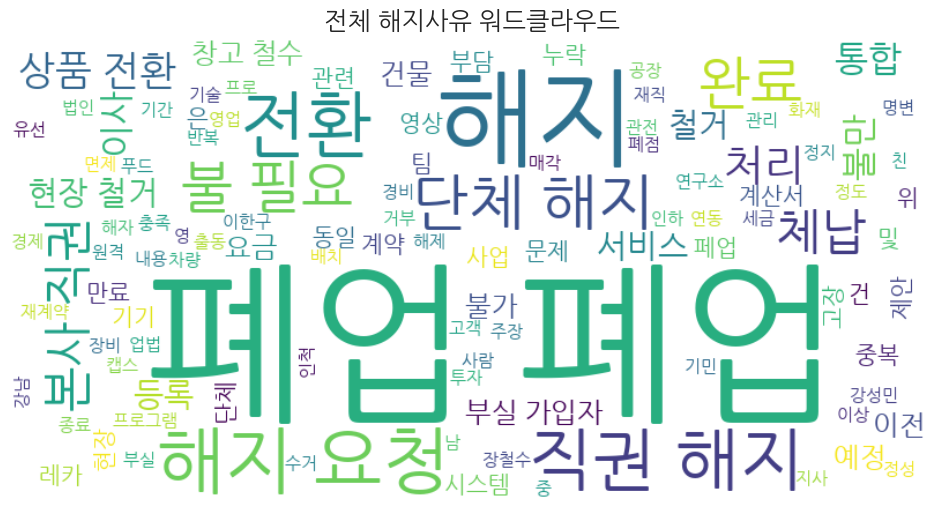

In [13]:
from wordcloud import WordCloud

text = ' '.join(df['형태소'])
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("전체 해지사유 워드클라우드", fontsize=18)
plt.show()

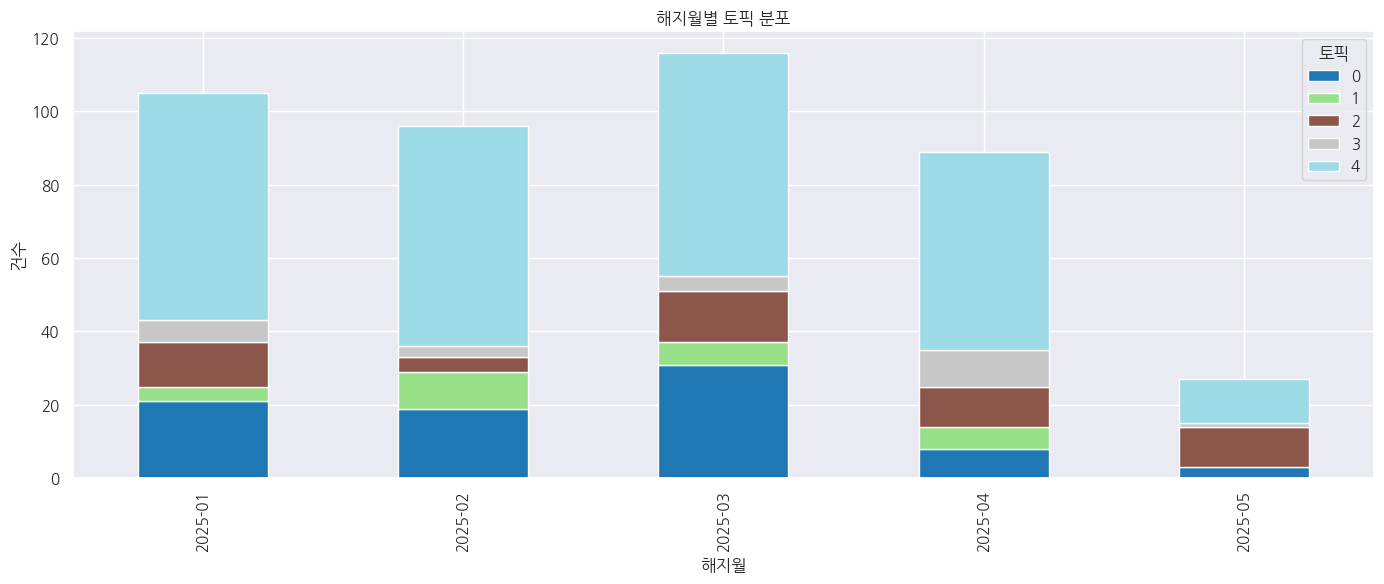

In [14]:
# 각 문서별 토픽 분류 (확률이 가장 높은 토픽)
topic_result = lda.transform(X)
df['토픽'] = topic_result.argmax(axis=1)

# 해지월별 토픽 분포
topic_by_month = df.groupby(['해지월', '토픽']).size().unstack(fill_value=0)

# 시각화
topic_by_month.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("해지월별 토픽 분포")
plt.xlabel("해지월")
plt.ylabel("건수")
plt.legend(title="토픽")
plt.tight_layout()
plt.show()

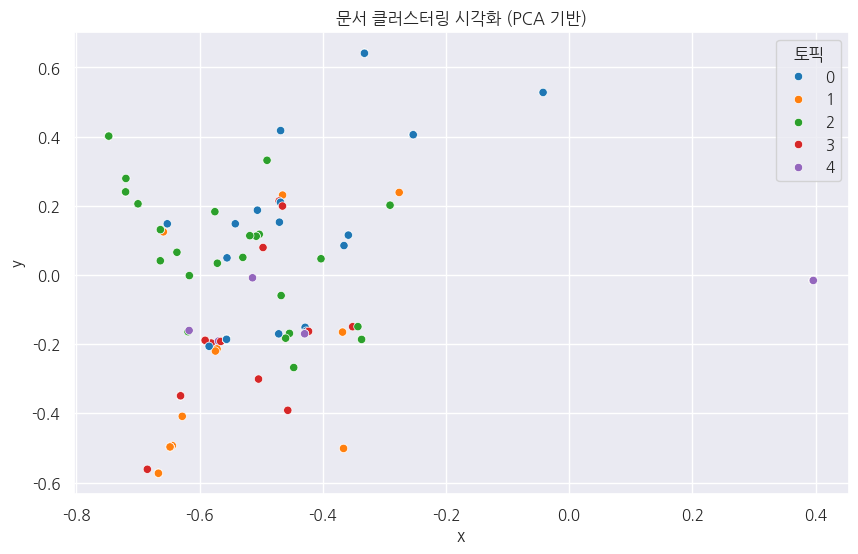

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

# 차원 축소
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

df['x'] = components[:, 0]
df['y'] = components[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='토픽', palette='tab10')
plt.title("문서 클러스터링 시각화 (PCA 기반)")
plt.show()

In [16]:
# 예시: 첫 번째 토픽 주요 키워드 기준 대표 문장
keywords = [vectorizer.get_feature_names_out()[i] for i in lda.components_[0].argsort()[-10:]]
print(f"[토픽1 대표 키워드] {keywords}")

for word in keywords:
    samples = df[df['형태소'].str.contains(word)].head(3)['사유통합'].tolist()
    print(f"\n[키워드: {word}] 대표 문장 예시:")
    for s in samples:
        print(f"- {s}")

[토픽1 대표 키워드] ['종료', '폐점', '건물', '누락', '창고', '철수', '등록', '요청', '폐업', '해지']

[키워드: 종료] 대표 문장 예시:
- 휴/폐업 현장종료

[키워드: 폐점] 대표 문장 예시:
- 휴/폐업 폐점으로 해지

[키워드: 건물] 대표 문장 예시:
- 휴/폐업 건물매각 폐업해지
- 휴/폐업 현장철수로 인한 건물철거예정
- 휴/폐업 제일푸드시스템 동일건물 타사전환

[키워드: 누락] 대표 문장 예시:
- 해지누락 
- 휴/폐업 강성민원 해지누락 kt사업이관전부터 해지요청

[키워드: 창고] 대표 문장 예시:
- 휴/폐업 창고철수 폐업해지
- 휴/폐업 창고철수 폐업 해지
- 휴/폐업 창고철수 폐업 해지

[키워드: 철수] 대표 문장 예시:
- 휴/폐업 창고철수 폐업해지
- 휴/폐업 창고철수 폐업 해지
- 휴/폐업 창고철수 폐업 해지

[키워드: 등록] 대표 문장 예시:
- 휴/폐업 해자등록
- 휴/폐업 해지등록
- 휴/폐업 해지등록

[키워드: 요청] 대표 문장 예시:
- 휴/폐업 폐업해지요청
- 본사단체건해지 계약기간 만료로 해지요청 강남법인영업2팀 정성영
- 휴/폐업 화재로인한 해지요청

[키워드: 폐업] 대표 문장 예시:
- 휴/폐업 이사로 해지
- 휴/폐업 이사로 해지
- 휴/폐업 공장통합해지

[키워드: 해지] 대표 문장 예시:
- 휴/폐업 이사로 해지
- 휴/폐업 이사로 해지
- 휴/폐업 공장통합해지


In [17]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('/content/drive/MyDrive/해지사유분석_리포트.pdf') as pdf:
    # 페이지 1: 제목
    plt.figure(figsize=(8, 3))
    plt.text(0.5, 0.5, '해지사유 분석 리포트\n(토픽 모델링 기반)', fontsize=20, ha='center')
    plt.axis('off')
    pdf.savefig(); plt.close()

    # 페이지 2: 워드클라우드
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("전체 해지사유 워드클라우드", fontsize=18)
    pdf.savefig(); plt.close()

    # 페이지 3: 해지월별 토픽 분포
    topic_by_month.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title("해지월별 토픽 분포")
    plt.xlabel("해지월")
    plt.ylabel("건수")
    plt.legend(title="토픽")
    plt.tight_layout()
    pdf.savefig(); plt.close()

    print("✅ PDF 보고서 저장 완료")

✅ PDF 보고서 저장 완료


In [18]:
# PDF 파일 경로
pdf_path = "/content/drive/MyDrive/해지사유분석_리포트.pdf"

In [19]:
from IPython.display import IFrame

# Google Drive에 저장된 PDF 미리보기
IFrame(pdf_path, width=800, height=600)

In [20]:
# ✅ 1. 필수 라이브러리 설치
!pip install konlpy wordcloud matplotlib pandas scikit-learn tqdm seaborn --quiet

# ✅ 2. 나눔고딕 폰트 설치 및 적용
!apt-get update -qq
!apt-get install -y fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 폰트 적용
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.set(font='NanumGothic', rc={'axes.unicode_minus': False})
print("✅ 나눔고딕 폰트 적용 완료")

# ✅ 3. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 4. 데이터 불러오기
import pandas as pd
file_path = "/content/drive/MyDrive/시설/리텐션/관리고객해지사유분석_0509.csv"
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()  # 컬럼 공백 제거
print("✅ CSV 로드 및 컬럼 정리 완료")

# ✅ 5. 해지월 + 사유 통합 생성
df['해지월'] = pd.to_datetime(df['해지일자'], errors='coerce').dt.to_period('M')
df['사유통합'] = df[['해지사유1', '해지사유2']].fillna('').agg(' '.join, axis=1)

# ✅ 6. 형태소 분석 (명사 추출)
from konlpy.tag import Okt
from tqdm import tqdm
tqdm.pandas()

okt = Okt()
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

df['형태소'] = df['사유통합'].progress_apply(extract_nouns)
print("✅ 형태소 분석 완료")

# ✅ 7. TF-IDF 벡터화 + LDA 토픽 모델링
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# 토픽 분류 저장
df['토픽'] = lda.transform(X).argmax(axis=1)

# ✅ 8. 워드클라우드 생성
from wordcloud import WordCloud

text = ' '.join(df['형태소'])
wordcloud = WordCloud(font_path=font_files[0], background_color='white', width=800, height=400).generate(text)

# ✅ 9. 해지월별 토픽 분포 시각화
topic_by_month = df.groupby(['해지월', '토픽']).size().unstack(fill_value=0)

# ✅ 10. PDF 리포트 저장
from matplotlib.backends.backend_pdf import PdfPages

report_path = "/content/drive/MyDrive/해지사유분석_리포트.pdf"
with PdfPages(report_path) as pdf:
    # 1. 제목 페이지
    plt.figure(figsize=(8, 3))
    plt.text(0.5, 0.5, '해지사유 분석 리포트\n(토픽 모델링 기반)', fontsize=20, ha='center')
    plt.axis('off')
    pdf.savefig(); plt.close()

    # 2. 워드클라우드 페이지
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("전체 해지사유 워드클라우드", fontsize=18)
    pdf.savefig(); plt.close()

    # 3. 해지월별 토픽 분포
    topic_by_month.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title("해지월별 토픽 분포")
    plt.xlabel("해지월")
    plt.ylabel("건수")
    plt.legend(title="토픽")
    plt.tight_layout()
    pdf.savefig(); plt.close()

print(f"✅ PDF 리포트 저장 완료: {report_path}")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
✅ 나눔고딕 폰트 적용 완료
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSV 로드 및 컬럼 정리 완료


100%|██████████| 433/433 [00:00<00:00, 870.79it/s]


✅ 형태소 분석 완료
✅ PDF 리포트 저장 완료: /content/drive/MyDrive/해지사유분석_리포트.pdf


In [21]:
# 토픽별 주요 키워드 보기
for idx, topic in enumerate(lda.components_):
    top_keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"토픽 {idx}: {', '.join(top_keywords)}")

토픽 0: 해지, 폐업, 요청, 등록, 철수, 창고, 누락, 건물, 폐점, 종료
토픽 1: 전환, 상품, 처리, 부실, 페업, 가입자, 유선, 캡스, 주장, 반복
토픽 2: 해지, 단체, 완료, 직권, 철거, 본사, 현장, 예정, 처리, 체납
토픽 3: 필요, 이사, 통합, 체납, 이전, 화재, 사업, 시스템, 공장, 만료
토픽 4: 폐업, 명변, 거부, 재직, 인척, 계산서, 관련, 기민, 내용, 사람


In [22]:
# 수동 매핑 정의
topic_labels = {
    0: "폐업/철거",
    1: "요금 불만",
    2: "납부 문제",
    3: "단순 요청/불필요",
    4: "기타/기술 문제"
}

# 새로운 컬럼에 적용
df['토픽명'] = df['토픽'].map(topic_labels)

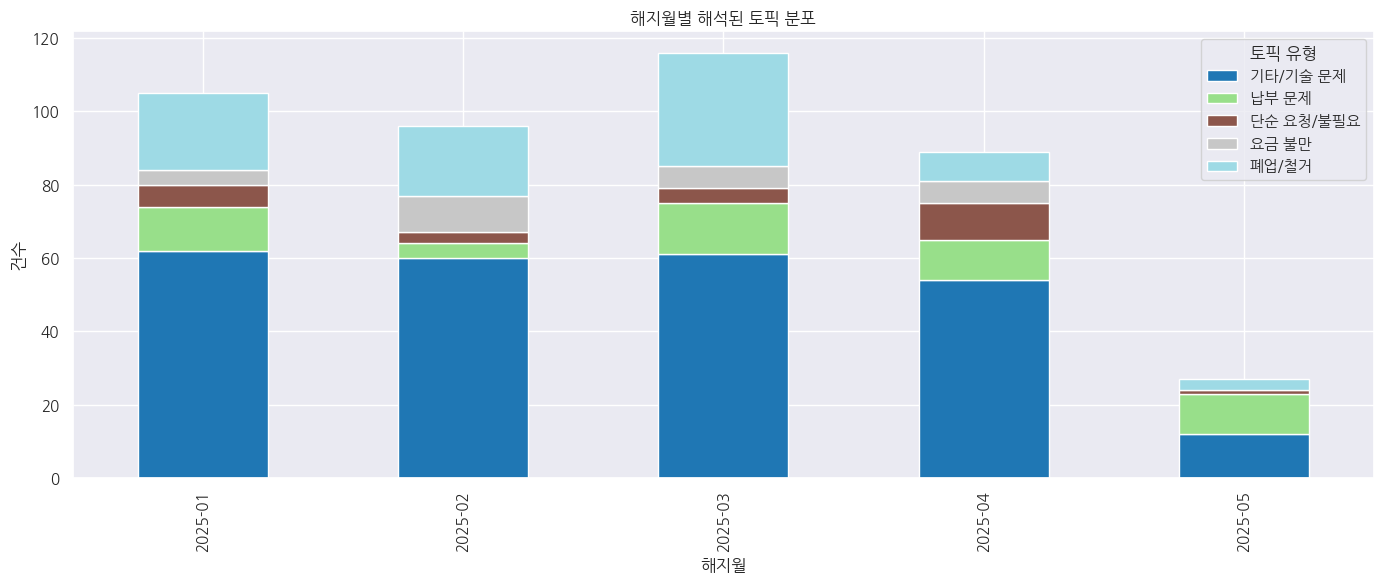

In [23]:
# 월별 토픽명 분포
topic_by_month_named = df.groupby(['해지월', '토픽명']).size().unstack(fill_value=0)

# 그래프
topic_by_month_named.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("해지월별 해석된 토픽 분포")
plt.xlabel("해지월")
plt.ylabel("건수")
plt.legend(title="토픽 유형")
plt.tight_layout()
plt.show()

In [2]:
# ✅ 1. 라이브러리 설치
!pip install konlpy wordcloud matplotlib pandas scikit-learn tqdm seaborn --quiet

# ✅ 2. 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.set(font='NanumGothic', rc={'axes.unicode_minus': False})

print("✅ 나눔고딕 폰트 적용 완료")

# ✅ 3. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 4. CSV 불러오기 (해지사유1만 사용)
import pandas as pd
file_path = "/content/drive/MyDrive/시설/리텐션/관리고객해지사유분석_0509.csv"
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['해지월'] = pd.to_datetime(df['해지일자'], errors='coerce').dt.to_period('M')
df['사유1'] = df['해지사유1'].fillna('')

# ✅ 5. 형태소 분석 (명사만 추출)
from konlpy.tag import Okt
from tqdm import tqdm
tqdm.pandas()

okt = Okt()
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

df['형태소'] = df['사유1'].progress_apply(extract_nouns)

# ✅ 6. TF-IDF + LDA 토픽 모델링
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['형태소'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
df['토픽'] = lda.transform(X).argmax(axis=1)

# ✅ 7. 사람이 해석한 토픽명 수동 라벨링
topic_keywords = {}
for idx, topic in enumerate(lda.components_):
    keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    topic_keywords[idx] = keywords
    print(f"토픽 {idx}: {keywords}")

# 예시 라벨: 상황에 맞게 수정 가능
topic_labels = {
    0: "폐업/철거",
    1: "요금불만",
    2: "납부문제",
    3: "단순요청",
    4: "기타기술"
}
df['토픽명'] = df['토픽'].map(topic_labels)

# ✅ 8. 워드클라우드
from wordcloud import WordCloud

text = ' '.join(df['형태소'])
wordcloud = WordCloud(font_path=font_files[0], background_color='white', width=800, height=400).generate(text)

# ✅ 9. 해지월별 토픽명 분포 시각화
topic_by_month_named = df.groupby(['해지월', '토픽명']).size().unstack(fill_value=0)

# ✅ 10. PDF 리포트 저장
from matplotlib.backends.backend_pdf import PdfPages

report_path = "/content/drive/MyDrive/해지사유1_기반_리포트.pdf"
with PdfPages(report_path) as pdf:
    # 1. 제목
    plt.figure(figsize=(8, 3))
    plt.text(0.5, 0.5, '해지사유1 기반 분석 리포트\n(토픽 모델링)', fontsize=20, ha='center')
    plt.axis('off')
    pdf.savefig(); plt.close()

    # 2. 워드클라우드
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("해지사유1 워드클라우드", fontsize=18)
    pdf.savefig(); plt.close()

    # 3. 해지월별 토픽 분포
    topic_by_month_named.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
    plt.title("해지월별 해지사유 토픽 분포")
    plt.xlabel("해지월")
    plt.ylabel("건수")
    plt.legend(title="토픽")
    plt.tight_layout()
    pdf.savefig(); plt.close()

print(f"✅ PDF 저장 완료: {report_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 39.0 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (48.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fo

100%|██████████| 433/433 [00:05<00:00, 76.22it/s] 


토픽 0: ['단체', '해지', '상품', '체납', '전환', '만료', '계약', '기술', '문제', '누락']
토픽 1: ['불만', '서비스', '이전', '이사', '누락', '요금', '해지', '폐업', '전환', '체납']
토픽 2: ['폐업', '전환', '해지', '요금', '체납', '문제', '기술', '만료', '계약', '상품']
토픽 3: ['전환', '직권', '본사', '해지', '폐업', '요금', '체납', '상품', '기술', '문제']
토픽 4: ['필요', '부실', '가입자', '요금', '세금', '관련', '계산서', '불만', '폐업', '전환']
✅ PDF 저장 완료: /content/drive/MyDrive/해지사유1_기반_리포트.pdf


In [16]:
from collections import Counter

# 명사 기준 상위 빈도 단어
words = ' '.join(df['형태소']).split()
top_terms = Counter(words).most_common(30)
print("가장 많이 언급된 단어:")
for word, count in top_terms:
    print(f"{word}: {count}")

가장 많이 언급된 단어:
폐업: 335
해지: 23
전환: 16
단체: 13
불: 10
필요: 10
본사: 9
직권: 9
상품: 6
체납: 4
불만: 3
건: 2
이전: 2
이사: 2
부실: 2
가입자: 2
서비스: 2
누락: 1
세금: 1
계산서: 1
관련: 1
기술: 1
문제: 1
계약: 1
만료: 1
요금: 1


In [17]:
replace_map = {
    ("불", "필요"): "불필요",
    ("상품", "불만"): "상품불만",
    ("기술", "문제"): "기술문제",
    ("세금", "계산서", "관련"): "세금계산서관련",
    ("부실", "가입자"): "부실가입자",
    ("이전", "이사"): "이전이사",
    ("단체", "해지"): "단체해지",
    ("상품", "전환"): "상품전환",
    ("직권", "해지"): "직권해지",
    ("본사", "직권", "해지"): "본사직권해지"
}


In [18]:
def 합성어_치환(형태소문장):
    words = 형태소문장.split()
    new_words = []
    i = 0
    while i < len(words):
        found = False
        for combo, new_term in replace_map.items():
            if tuple(words[i:i+len(combo)]) == combo:
                new_words.append(new_term)
                i += len(combo)
                found = True
                break
        if not found:
            new_words.append(words[i])
            i += 1
    return ' '.join(new_words)

# 적용
df['형태소_보정'] = df['형태소'].apply(합성어_치환)

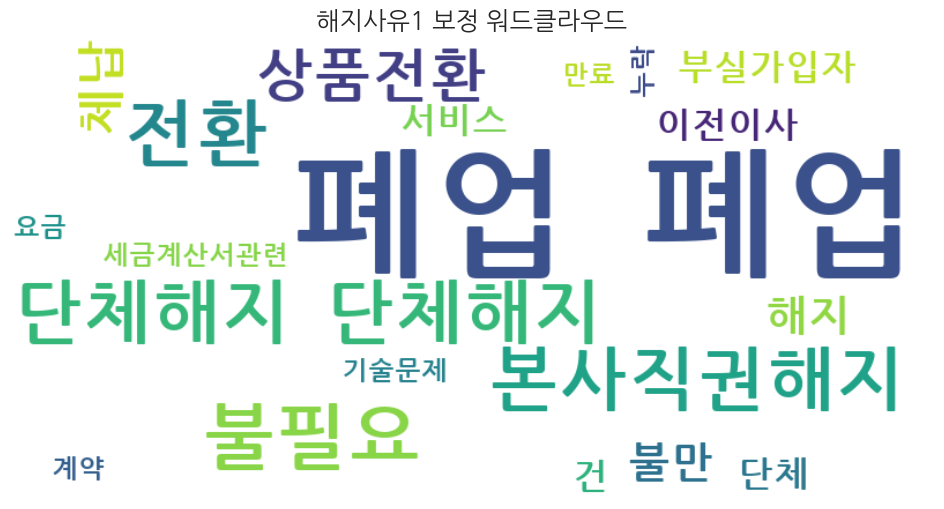

In [19]:
# 새로운 워드클라우드 생성
from wordcloud import WordCloud
text = ' '.join(df['형태소_보정'])
wordcloud = WordCloud(font_path=font_files[0], background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("해지사유1 보정 워드클라우드", fontsize=18)
plt.show()

In [21]:
# 사유1 중 '폐업' 포함된 문장 수
df['is_폐업'] = df['사유1'].str.contains('폐업')
print(df['is_폐업'].value_counts())

# 전체 대비 폐업 언급 비율도 시각화에 함께 표시 가능

is_폐업
True     335
False     98
Name: count, dtype: int64


In [15]:
def 분류기(text):
    if '폐업' in text or '철거' in text:
        return '폐업'
    elif '체납' in text or '미납' in text:
        return '납부문제'
    elif '요금' in text or '계약' in text:
        return '요금불만'
    elif '직권' in text or '불필요' in text:
        return '단순해지'
    else:
        return '기타'

df['사전분류'] = df['사유1'].apply(분류기)